In [70]:
#Download package
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
%pylab inline


def normalpdf(x, u, v):
    return 1 / (v * np.sqrt(2 * np.pi)) * np.exp(-(x - u) ** 2 / 2 / v**2)

Populating the interactive namespace from numpy and matplotlib


In [71]:
#parameter
u = 200  # 均值
v = 30   # 標準差
x = np.arange(0,1000, 1)
y = normalpdf(x, u, v)   #需求服從常態  
price = 50  #售價  
cost = 20   #成本
s = 10      #短缺成本
vi = 15     #殘值

In [72]:
"""典型報童最佳訂貨量(均勻分布)"""
def uni_class_optorder(a, b):
    return ((price + s - cost)*b + (cost - vi)*a)/(price + s - vi)

In [73]:
"""易貨交換最佳訂貨量(均勻分布)"""
def uni_optorder(a, b, Q0, r):
    return ((price+s-cost)*b+(cost-vi)*a + Q0*((1-r)*price-vi))/(price+s-vi)

In [74]:
"""易貨交換最佳訂貨量(常態分布)"""
def class_optorder(Q0):
    
    profitline = [np.sum(np.array([class_profit(Q, d, Q0) for d in x]) * y)for Q in x]
    max_value = np.max(profitline)
    max_indx = np.argmax(profitline)
    
    return max_indx, max_value

In [75]:
"""典型報童利潤"""
def class_profit(Q, d, Q0):
    
    if Q <= d:
        return Q*(price - cost)- s*(d - Q) - Q0*price
    else:
        return d*price + vi*(Q - d) - cost*Q - Q0*price

In [76]:
"""易貨交換最佳訂貨量(常態分布)"""
def optorder(Q0, r):
    
    profitline = [np.sum(np.array([profit(Q, d, Q0, r) for d in x]) * y)for Q in x]
    max_value = np.max(profitline)
    max_indx = np.argmax(profitline)
    
    return max_indx, max_value

In [77]:
"""易貨交換利潤"""
def profit(Q, d, Q0, r):

    if Q <= d:
        return Q*(price - cost)- s*(d - Q) - Q0*price
    
    elif Q >= d and Q <= d + Q0:
        return d*price - cost*Q + r*price*(Q - d)- price*(Q0 - Q + d)
    
    else:
        return d*price - cost*Q - r*price*Q0 + vi*(Q - Q0 - d)

In [78]:
"""不確定性易貨交換最佳訂貨量(常態分布)"""
def u_optorder(Q0, r, wu, wv):
    
    wy = normalpdf(x, wu, wv)
    profitline = [np.sum(np.array([np.sum(np.array([uncertainbarter_profit(Q, d, Q0, r, w) for d in x]) * y)for w in x])*wy) for Q in x]
    max_value = np.max(profitline)
    max_indx = np.argmax(profitline)
    
    return max_indx, max_value


In [79]:
"""不確定性易貨交換利潤"""
def uncertainbarter_profit(Q, d, Q0, r, w):

    if Q <= d:
        return Q*(price - cost)- s*(d - Q) - Q0 * price
    
    elif Q >= d and Q <= d + w*Q0:
        return d*price - cost*Q + r*price*(Q - d)- price*(Q0 - Q + d)
    
    else:
        
        if w>=0 and w<1:
            return d*price - cost*Q - r*price*w*Q0 + vi*(Q - w*Q0 - d) - (1-w)*price*Q0
        else: 
            return d*price  - cost*Q - r*price*Q0 + vi*(Q - Q0 - d)

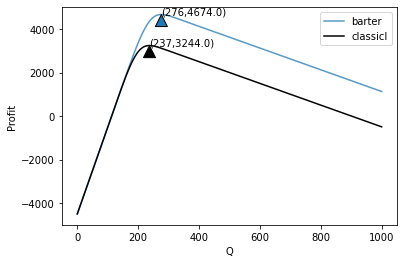

In [80]:
#最佳訂購量
def orderplot(labal, x_index, Q0, r):
    """plot"""
    b_index, b_value = optorder(Q0, r)
    cl_index, cl_value = class_optorder(Q0)
    
    profitline = [np.sum(np.array([profit(Q, d, Q0, r) for d in x]) * y)for Q in x]
    class_profitline = [np.sum(np.array([class_profit(Q, d, Q0) for d in x]) * y)for Q in x]
    
    plt.ylim(-5000, 5000,1000)                                          # 設定y軸繪圖範圍
    # 繪圖並設定線條顏色、寬度、圖例
    line1, = plt.plot(x_index, profitline, color = 'tab:blue', label = 'barter', alpha=0.75)
    show_max1 = '({x},{y})'.format(x=round(b_index, 0), y=round(b_value, 0))
    plt.annotate(show_max1, xy=(b_index, b_value),
            arrowprops=dict(facecolor='tab:blue',shrink=0.05))
    
    line2, = plt.plot(x_index, class_profitline, color='black', label = 'classicl', alpha=1)
    show_max2 = '({x},{y})'.format(x=round(cl_index, 0), y=round(cl_value, 0))
    plt.annotate(show_max2, xy=(cl_index, cl_value),
            arrowprops=dict(facecolor='black',shrink=0.05))
    
    
    plt.legend(handles = [line1, line2], loc='upper right')
    plt.xlabel(labal)
    plt.ylabel('Profit')
    plt.show()                           

orderplot('Q', x, 50, 0.05)

In [81]:
#出圖

def plot(labal, x_index, opt_inventory, opt_profit, classical_inventory, classical_profit,scale):
    """plot"""
    fig, ax1 = plt.subplots()
    plt.xlabel(labal)
    x_ticks = np.arange(x_index[0],x_index[-1],scale)
    plt.xticks(x_ticks)
    ax2 = ax1.twinx()
    
    ax1.set_ylabel('opt order', color='tab:blue')
    ax1.plot(x_index, opt_inventory, color='tab:blue', alpha=0.75)
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    ax2.set_ylabel('Opt prof', color='black')
    ax2.plot(x_index, opt_profit, color='black', alpha=1)
    ax2.tick_params(axis='y', labelcolor='black')
    
    fig.tight_layout()
    plt.show()
    
    # #######################################################
    order_increase = [(opt_inventory[i]-classical_inventory[i])*100/classical_inventory[i] for i in range(len(x_index))]
    profit_increase = [(opt_profit[i]-classical_profit[i])*100/classical_profit[i] for i in range(len(x_index))]
    
    fig, ax1 = plt.subplots()
    plt.xlabel(labal)
    x_ticks = np.arange(x_index[0],x_index[-1],scale)
    plt.xticks(x_ticks)
    ax2 = ax1.twinx()
    
    ax1.set_ylabel('order_increase (%)', color='tab:blue')
    ax1.plot(x_index, order_increase, color='tab:blue', alpha=0.75)
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    ax2.set_ylabel('profit_increase (%)', color='black')
    ax2.plot(x_index, profit_increase, color='black', alpha=1)
    ax2.tick_params(axis='y', labelcolor='black')
    
    fig.tight_layout()
    plt.show()

In [41]:
"""探討隨Q0變化"""
bt = np.arange(80,100,2)
def draw(a):
    opt_inventory = []
    opt_profit = []

    classical_inventory = []
    classical_profit = []


    for Q0 in bt:
    
        index, value = optorder(Q0+a, r=0.05)
        opt_inventory.append(index)
        opt_profit.append(value)
    
        index, value = class_optorder(Q0+a)
        classical_inventory.append(index)
        classical_profit.append(value)

    plot('Q0', bt+a , opt_inventory, opt_profit, classical_inventory, classical_profit,scale = 2)
    
interact(draw,a=(0,20,1))

interactive(children=(IntSlider(value=10, description='a', max=20), Output()), _dom_classes=('widget-interact'…

<function __main__.draw(a)>

In [31]:
"""探討隨r變化"""
R = np.arange(0.05,0.16,0.01)
def draw1(b):
    opt_inventory = []
    opt_profit = []
    classical_inventory = []
    classical_profit = []

    for r in R:
    
        index, value = optorder(Q0=50, r=r+b)
        opt_inventory.append(index)
        opt_profit.append(value)
    
        index, value = class_optorder(Q0=50)
        classical_inventory.append(index)
        classical_profit.append(value)
 
    plot('r', R+b , opt_inventory, opt_profit, classical_inventory, classical_profit,scale = 0.01)
interact(draw1,b=(0,0.1,0.01))

interactive(children=(FloatSlider(value=0.05, description='b', max=0.1, step=0.01), Output()), _dom_classes=('…

<function __main__.draw1(b)>

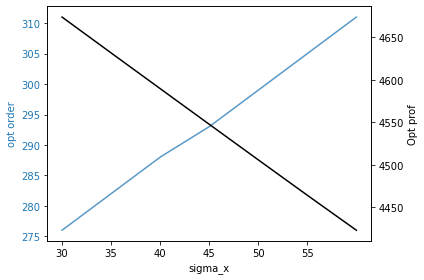

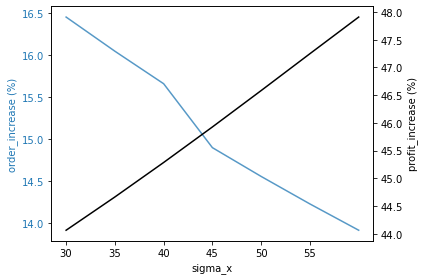

In [82]:
"""探討隨d變化"""
V = np.arange(30,65,5)
opt_inventory = []
opt_profit = []
classical_inventory = []
classical_profit = []

for v in V:
    y = normalpdf(x, u=200, v=v)
    index, value = optorder(Q0=50, r=0.05)
    opt_inventory.append(index)
    opt_profit.append(value)
    
    index, value = class_optorder(Q0=50)
    classical_inventory.append(index)
    classical_profit.append(value)
 
plot('sigma_x', V , opt_inventory, opt_profit, classical_inventory, classical_profit,scale = 5)